# load_plot_analysis
Author: Noah Stiegler

April 2023

This notebook takes you through loading an analysis file saved by the create_mlreco_validation_analysis_data.py script and using the resulting data to make some plots. The script runs inference/analysis and saves the result as a .npy file, so this notebook starts by loading data from a .npy file. It then takes you through the structure of the data as saved by the script and how to make plots with it

First, import everything we'll need

In [27]:
# Everything uses numpy
import numpy as np

# Import from sklearn for making a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import matplotlib for viewing confusion matrices
import matplotlib.pyplot as plt

Next, open the saved analysis file using the np.load() command. We need to use pickle because the data is saved as a numpy array of dictionary of numpy arrays.

In [28]:
# Open the saved file & load in data
with open('/home/nstieg01/analyses/analysis_data_619k_0560.npy', 'rb') as f:
    result = np.load(f, allow_pickle=True)

The result itself is a numpy array, with one entry per event in the analyzed file. Each entry in the array is a dictionary, all with the same keys.

In [3]:
# We have 100 events in the result
len(result)

100

Each item of the result has the same structure (dictionary of values)
The important ones are:
- index - the index in the file of the event
- file - the name or path of the file it came from
- confusion_matrices - data to build confusion matrices

In [5]:
result[0].keys()

dict_keys(['index', 'file', 'loss', 'accuracy', 'segmentation_accuracy', 'segmentation_loss', 'segmentation_ghost_mask_accuracy', 'segmentation_ghost_mask_loss', 'segmentation_uresnet_accuracy', 'segmentation_uresnet_loss', 'segmentation_ghost2ghost', 'segmentation_nonghost2nonghost', 'segmentation_accuracy_class_0', 'segmentation_accuracy_class_1', 'segmentation_accuracy_class_2', 'segmentation_accuracy_class_3', 'segmentation_accuracy_class_4', 'ppn_reg_loss', 'ppn_mask_loss', 'ppn_type_loss', 'ppn_classify_endpoints_loss', 'ppn_classify_endpoints_accuracy', 'ppn_type_accuracy', 'ppn_mask_accuracy', 'ppn_mask_final_accuracy', 'ppn_regression_accuracy', 'ppn_num_positives', 'ppn_num_voxels', 'ppn_loss', 'ppn_accuracy', 'confusion_matrices'])

In [25]:
# print(result[0]["checkpoint"]) # The first analysis file made, analysis_data_619k_0560.npy, doesn't have this option
print(result[0]["file"])

/home/nstieg01/nWorking/validation_proj/mlrecodata_bnb_nu_0560.root


The value for most of the keys is just an integer or string, but the confusion_matrices value is a little more complicated. The value for the key confusion_matrices for each result is also a dictionary. Its keys are:
- bins - the bins used to make the confusion matrix (network labels)
- labels - human readable labels for each of the bins
- cosmics - a confusion matrix for all voxels which come from cosmic background
- non_cosmics - a confusion_matrix for all voxels which are not part of background

In [26]:
result[0]["confusion_matrices"].keys()

dict_keys(['bins', 'labels', 'cosmics', 'non_cosmics'])

Here's how to get all of the same piece of data for all events in the result

In [7]:
# Example of how to get all of one piece of data for all the events in the result
accuracies = [event["accuracy"] for event in result]

And here's an example of using that data to make a confusion matrix

In [8]:
# Get cosmic, non-cosmic, and label data
# cosmic and non-cosmic are still arrays of confusion matrices for each event, will want to combine
non_cosmics = [event["confusion_matrices"]["non_cosmics"] for event in result]
cosmics = [event["confusion_matrices"]["cosmics"] for event in result]
labels = result[0]["confusion_matrices"]["labels"] # Labels should be the same for all, so just need labels from one

In [9]:
# Combine confusion matrices from all events, and then from the non-cosmics and cosmics for all events
all_non_cosmics = sum(non_cosmics)
all_cosmics = sum(cosmics)
total = all_non_cosmics + all_cosmics

In [10]:
# Return the normalized version a given confusion matrix
# True normalized means that rows add up to 100%
def normalize_true(confusion_matrix):
    normalized = np.zeros(confusion_matrix.shape)
    for i, row in enumerate(confusion_matrix):
        total = np.sum(row)
        for j, col in enumerate(row):
            if total != 0:
                normalized[i, j] = col / total
            else:
                normalized[i, j] = 0
    return normalized

In [11]:
# Make normalized confusion matrices
true_norm_total = normalize_true(total)
true_norm_all_cosmics = normalize_true(all_cosmics)
true_norm_all_non_cosmics = normalize_true(all_non_cosmics)

### All events neutrino + cosmic

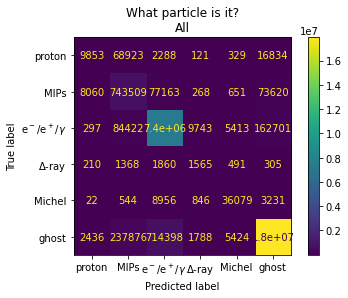

In [12]:
# Plot the total confusion matrix for all events
disp = ConfusionMatrixDisplay(confusion_matrix=total, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nAll")
plt.show()

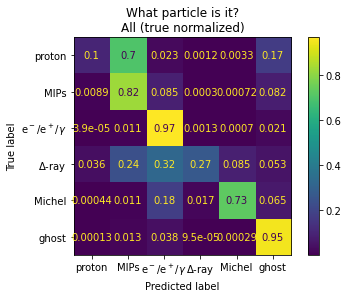

In [13]:
# Plot the total confusion matrix for all events true normalized
disp = ConfusionMatrixDisplay(confusion_matrix=true_norm_total, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nAll (true normalized)")
plt.show()

### Just neutrino (non-cosmic)

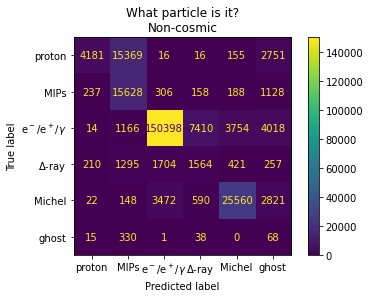

In [14]:
# Plot the total confusion matrix for all events
disp = ConfusionMatrixDisplay(confusion_matrix=all_non_cosmics, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nNon-cosmic")
plt.show()

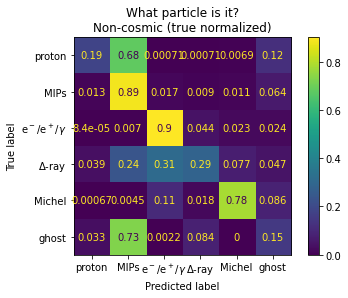

In [15]:
# Plot the total confusion matrix for all events true normalized
disp = ConfusionMatrixDisplay(confusion_matrix=true_norm_all_non_cosmics, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nNon-cosmic (true normalized)")
plt.show()

If you just want a confusion matrix for a few events from the analysis file, here's how

In [16]:
all_non_cosmics_3 = sum(non_cosmics[0:3])
all_cosmics_3 = sum(cosmics[0:3])
total_3 = all_non_cosmics_3 + all_cosmics_3

# Make normalized confusion matrices
true_norm_total_3 = normalize_true(total_3)
true_norm_all_cosmics_3 = normalize_true(all_cosmics_3)
true_norm_all_non_cosmics_3 = normalize_true(all_non_cosmics_3)

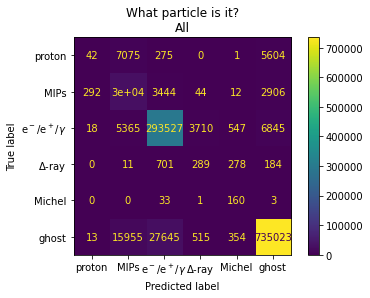

In [17]:
# Plot the total confusion matrix for all events
disp = ConfusionMatrixDisplay(confusion_matrix=total_3, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nAll")
plt.show()

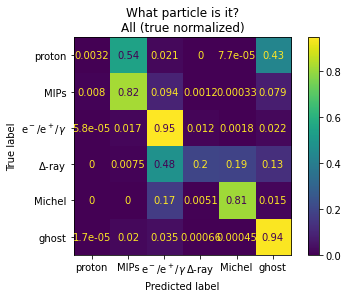

In [18]:
# Plot the total confusion matrix for all events true normalized
disp = ConfusionMatrixDisplay(confusion_matrix=true_norm_total_3, display_labels=labels)
disp.plot()
plt.title("What particle is it?\nAll (true normalized)")
plt.show()